# ***Supermart Grocery Sales - Retail Analytics Dataset.***

![Supermart Grocery Store](https://static.vecteezy.com/system/resources/previews/025/449/326/original/cartoon-grocery-store-with-kawaii-style-goods-free-vector.jpg)


# ***1. Introduction***

## ***Project Overview***

*This notebook demonstrates the process of Netflix Data Cleaning, Analysis and Visulization. We'll walk through the following steps:*

*1. Importing Libraries*

*2. Load the Dataset*

*3. Data Preprocessing*

*4. Exploratory Data Analysis (EDA)*

*5. Conclusion and Insights*

## ***About Dataset***

*The Supermart Grocery Sales dataset is a comprehensive collection of sales data from a grocery store. This dataset is a cleaned and organized version of the original data, which can be accessed through this link. The data spans sales transactions from 2016 to 2017, offering insights into customer purchasing patterns and product trends. The dataset includes information such as order ID, customer name, category, subcategory, city, order date, region, sales, discount, profit, and state. This dataset will be analyzed using Python and visualized with matplotlib and seaborn to uncover trends and patterns in grocery sales. The purpose of this dataset is to apply data analysis and visualization techniques to gain insights into the retail industry. The cleaned data and visualizations can be found below.*

## ***Motivation***

*Accurate sales prediction models are crucial in the retail industry, facilitating:*

- *Understanding customer purchasing patterns and product trends to inform inventory management and supply chain strategies.*
- *Identifying opportunities to increase sales and customer loyalty through data-driven insights.*
- *Enhancing the shopping experience by providing personalized product recommendations based on purchase history and preferences.*
- *Optimizing product placement, pricing, and marketing efforts through data analysis and visualization.* 
- *Gaining a competitive edge in the retail industry by leveraging data insights to drive business decisions.*


## ***Data Description***

*Our dataset comprises the following key features:*

| *Feature* | *Description* |
|---------|-------------|
| Order ID | Unique identifier for each order |
| Customer Name | Name of the customer |
| Category | Category of the product |
| Sub Category | Sub-category of the product |
| City | City where the order was placed |
| Order Date | Date when the order was placed |
| Region | Region where the order was placed |
| Sales | Total sales of the order |
| Discount | Discount applied to the order |
| Profit | Profit earned on the order |
| State | State where the order was placed |

*This dataset provides a unique opportunity to delve into the factors that shape the popularity of Netflix content and develop a robust model for predicting audience preferences.*

### ***1. Importing Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# remove warnings
import warnings
warnings.filterwarnings('ignore')

### ***2. Load the Dataset***

In [2]:
import os
for dirname, _, filenames in os.walk('.\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\input\Supermart Grocery Sales - Retail Analytics Dataset.csv


In [3]:
# we have a dataset named netflix1 inside input folder
df = pd.read_csv('./input/Supermart Grocery Sales - Retail Analytics Dataset.csv')

# Display the first five rows of the dataset
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [4]:
# Describe the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [5]:
# Checking the shape of the data
num_rows, num_cols = df.shape

print("Shape of the Data:")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}\n")

Shape of the Data:
Number of Rows: 9994
Number of Columns: 11



### ***3. Data Preprocessing***

##### ***1. Check for Missing Values and Handle Them***

In [6]:
# Check for missing values
print(df.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


##### ***2. Convert Date Columns to DateTime Format***

In [7]:
# Function to convert date with multiple formats
def convert_date(date_str):
    for fmt in ('%d-%m-%Y', '%m/%d/%Y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if no format matches
    
# Apply the function to the 'Order Date' column
df['Order Date'] = df['Order Date'].apply(convert_date)

# Check for any NaT values after conversion
print(df['Order Date'].isnull().sum(), "dates could not be parsed.")

0 dates could not be parsed.


In [8]:
# Extract day, month, and year from 'Order Date'
df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

##### ***3. Check for Duplicates***

In [9]:
df.duplicated().any()

False

##### ***4. Label Encoding for Categorical Variable***

*Convert categorical variables such as Category, Sub Category, City, Region,
State, and Month into numerical values*

In [10]:
# # Initialize the label encoder
# le = LabelEncoder()

# # Encode categorical variables
# data['Category'] = le.fit_transform(data['Category'])
# data['Sub Category'] = le.fit_transform(data['Sub Category'])
# data['City'] = le.fit_transform(data['City'])
# data['Region'] = le.fit_transform(data['Region'])
# data['State'] = le.fit_transform(data['State'])
# data['Month'] = le.fit_transform(data['Month'])
# # Display the first few rows after encoding
# print(data.head())


### ***4. Exploratory Data Analysis (EDA)***

##### ***1. Top 10 Cities by Sales Performance.***

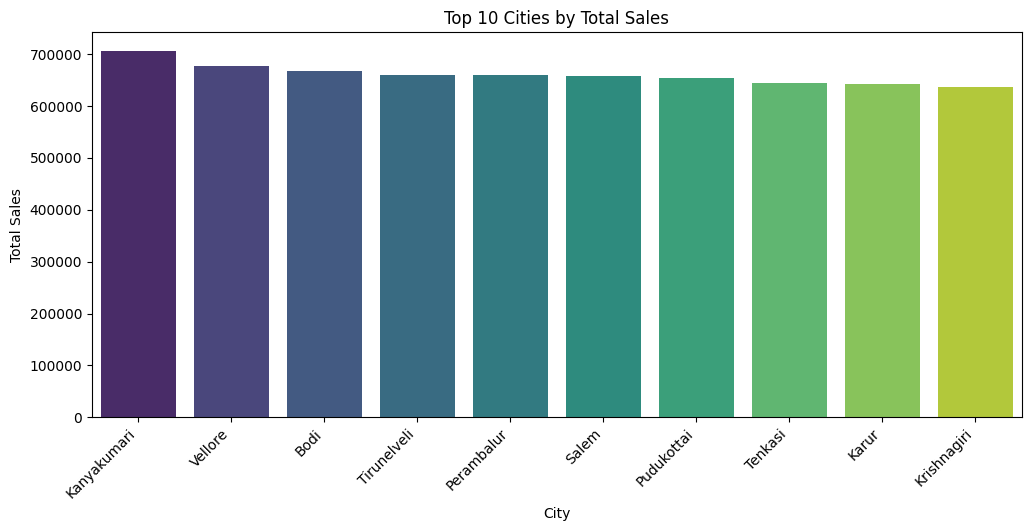

In [11]:
# Analyze total sales by city to identify the top-performing location
city_sales = df.groupby('City')['Sales'].sum().reset_index()
city_sales.sort_values(by='Sales', ascending=False, inplace=True)

# Plotting the top 10 cities by total sales
plt.figure(figsize=(12, 5))
sns.barplot(x='City', y='Sales', data=city_sales.head(10), palette='viridis')
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

##### ***2. Top 10 Cities by Profit Performance.***

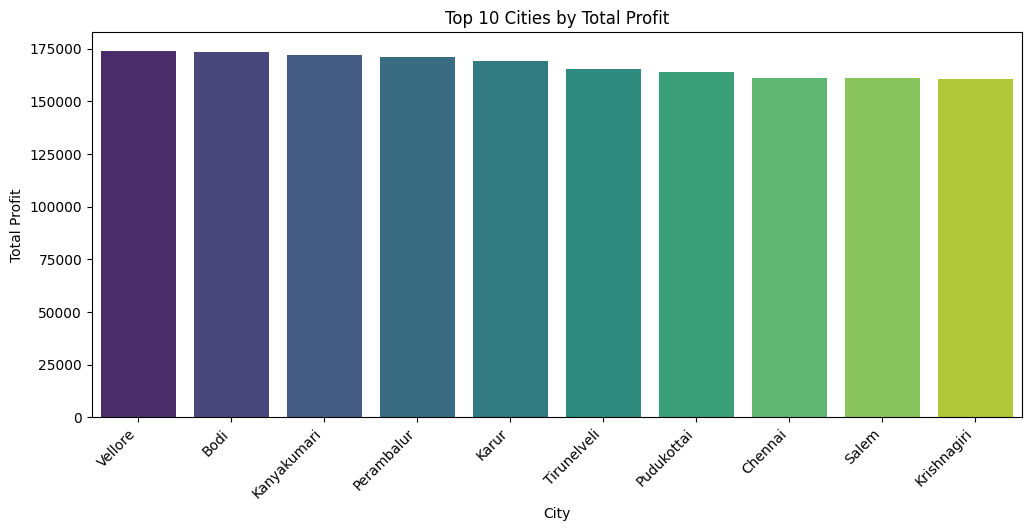

In [13]:
# Analyze total profit by city to identify the top-performing location
city_sales = df.groupby('City')['Profit'].sum().reset_index()
city_sales.sort_values(by='Profit', ascending=False, inplace=True)

# Plotting the top 10 cities by total profit
plt.figure(figsize=(12, 5))
sns.barplot(x='City', y='Profit', data=city_sales.head(10), palette='viridis')
plt.title('Top 10 Cities by Total Profit')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
city_sales

,City,Profit
21,Vellore,174073.01
0,Bodi,173655.13
6,Kanyakumari,172217.74
13,Perambalur,171132.19
7,Karur,169305.94
19,Tirunelveli,165169.01
14,Pudukottai,164072.63
1,Chennai,160921.33
16,Salem,160899.30
8,Krishnagiri,160477.48


##### ***3. Sales Trend Over Time***

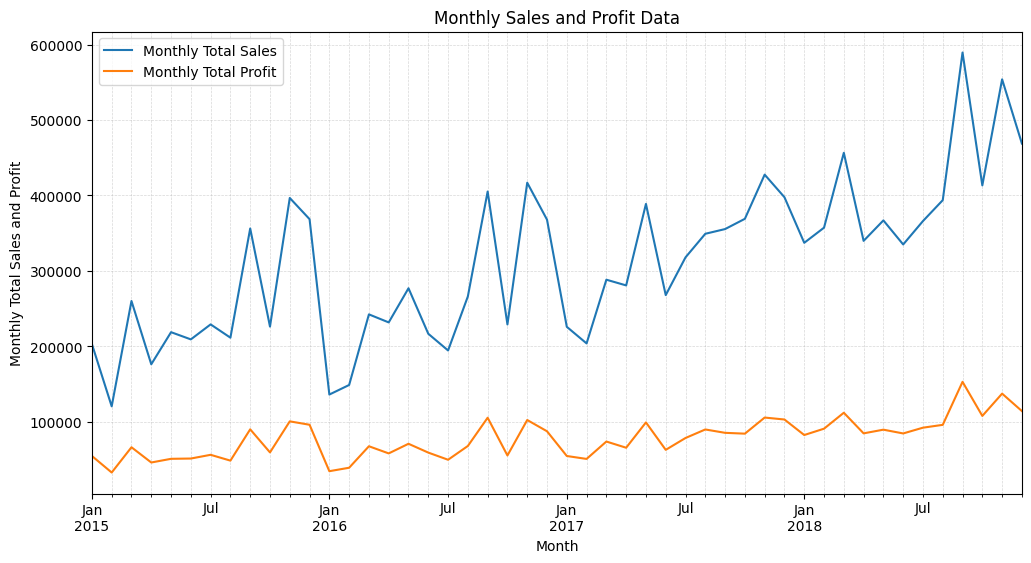

In [13]:
# Visualizing the monthly sales and profit data
plt.figure(figsize=(12, 6))
df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().plot(label='Monthly Total Sales')
df.groupby(df['Order Date'].dt.to_period('M'))['Profit'].sum().plot(label='Monthly Total Profit')
plt.title('Monthly Sales and Profit Data')
plt.xlabel('Month')
plt.ylabel('Monthly Total Sales and Profit')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)  # Added light grid lines
plt.show()

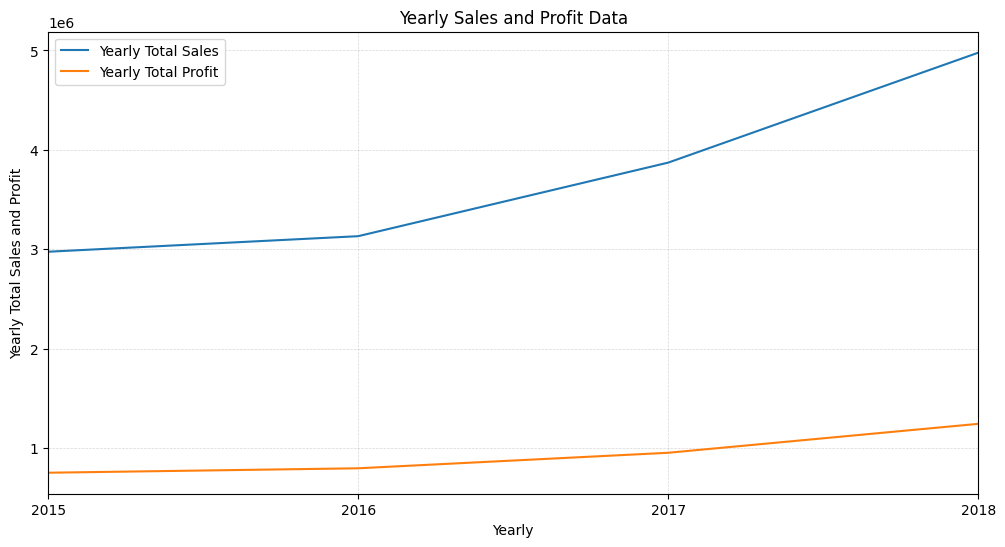

In [14]:
# Visualizing the yearly sales and profit data
plt.figure(figsize=(12, 6))
df.groupby(df['Order Date'].dt.to_period('Y'))['Sales'].sum().plot(label='Yearly Total Sales')
df.groupby(df['Order Date'].dt.to_period('Y'))['Profit'].sum().plot(label='Yearly Total Profit')
plt.title('Yearly Sales and Profit Data')
plt.xlabel('Yearly')
plt.ylabel('Yearly Total Sales and Profit')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)  # Added light grid lines
plt.show()

##### ***4. Rate of Repeat Customers Over Time***

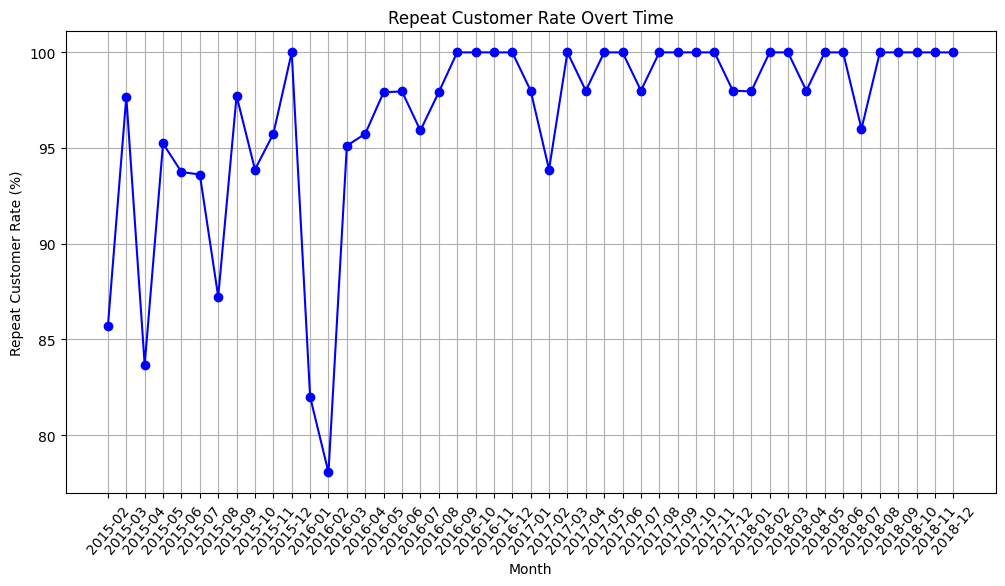

In [15]:
# Extract year and month
df['month'] = df['Order Date'].dt.to_period('M').sort_values()

# Get unique customers by month
customers_by_month = df.groupby('month')['Customer Name'].nunique()

# Initialize lists to store monthly retention rate values
start_customers = []
end_customers = []
new_customers = []
retention_rates = []

# Loop over each month
for i in range(1, len(customers_by_month)):
    # Start customers (S)
    start = customers_by_month.iloc[i-1]
    
    # End customers (E)
    end = customers_by_month.iloc[i]
    
    # New customers (N) in the current month
    current_month_customers = set(df[df['month'] == customers_by_month.index[i]]['Customer Name'])
    previous_month_customers = set(df[df['month'] == customers_by_month.index[i-1]]['Customer Name'])
    new_customers_in_month = len(current_month_customers - previous_month_customers)
    
    # Calculate retention rate using the formula
    retention_rate = ((end - new_customers_in_month) / start) * 100
    
    # Append results to the lists
    start_customers.append(start)
    end_customers.append(end)
    new_customers.append(new_customers_in_month)
    retention_rates.append(retention_rate)

# Create a DataFrame for retention rate data
retention_df = pd.DataFrame({
    'month': customers_by_month.index[1:],  # skip the first month
    'start_customers': start_customers,
    'end_customers': end_customers,
    'new_customers': new_customers,
    'retention_rate': retention_rates
})

# Plot the retention rate over time
plt.figure(figsize=(12,6))
plt.plot(retention_df['month'].astype(str), retention_df['retention_rate'], marker='o', color='b')
plt.title('Repeat Customer Rate Overt Time')
plt.xlabel('Month')
plt.ylabel('Repeat Customer Rate (%)')
plt.xticks(rotation=50)
plt.grid(True)
plt.show()

##### ***5. Average Purchase Value***

***5.1 Monthly Average Purchase Value***
- ***Advantages:***
  - *Provides more granular insights into customer purchasing patterns.*
  - *Helps identify seasonal trends and monthly fluctuations, such as sales spikes during holidays or promotions.*
  - *Useful for short-term strategy adjustments, such as tweaking marketing campaigns or optimizing inventory for monthly sales.*
  
- ***Best for:***
  - *Stores with frequent customer purchases (multiple purchases per month).*
  - *Monitoring customer engagement or retention on a month-to-month basis.*
  - *Adapting to immediate business needs, like promotional effectiveness.*

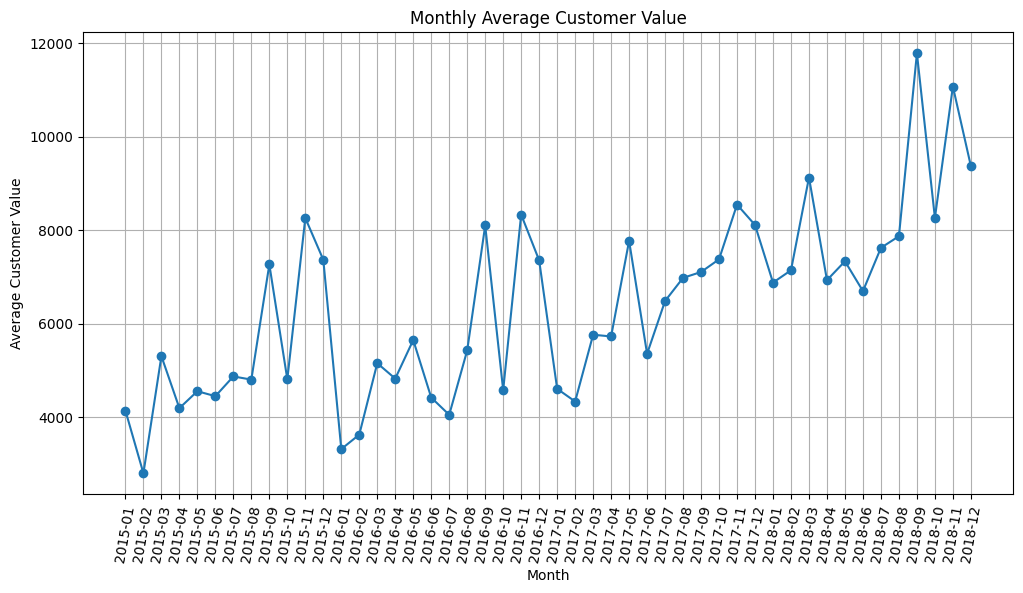

In [16]:
# Group by month and calculate total revenue and number of unique customers
monthly_data = df.groupby('month').agg(
    total_revenue=('Sales', 'sum'),
    unique_customers=('Customer Name', pd.Series.nunique)
).reset_index()

# Calculate Average Customer Value (ACV)
monthly_data['average_customer_value'] = monthly_data['total_revenue'] / monthly_data['unique_customers']

# Plot Average Customer Value
plt.figure(figsize=(12,6))
plt.plot(monthly_data['month'].astype(str), monthly_data['average_customer_value'], marker='o')
plt.title('Monthly Average Customer Value')
plt.xlabel('Month')
plt.ylabel('Average Customer Value')
plt.xticks(rotation=80)
plt.grid(True)
plt.show()

***5.1 Yearly Average Purchase Value***
- ***Advantages:***
  - *Gives a broader, long-term view of customer spending and loyalty.*
  - *Helps evaluate customer lifetime value and overall retention.*
  - *Ideal for strategic decision-making, such as yearly budgeting, pricing strategy, or stock planning.*

- ***Best for:***
  - *Stores with less frequent customer purchases (e.g., quarterly or annual purchases).*
  - *Analyzing long-term trends in customer behavior.*
  - *Developing long-term business strategies, like loyalty programs or yearly revenue forecasts.*

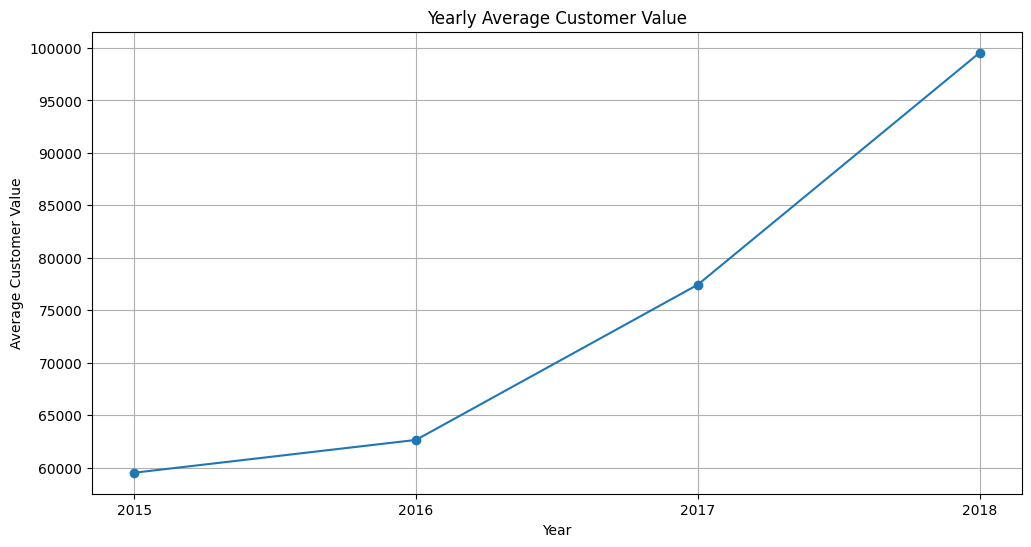

In [17]:
# Group by year and calculate total revenue and number of unique customers
yearly_data = df.groupby('Order Year').agg(
    total_revenue=('Sales', 'sum'),
    unique_customers=('Customer Name', pd.Series.nunique)
).reset_index()


# Calculate Average Customer Value (ACV)
yearly_data['average_customer_value'] = yearly_data['total_revenue'] / yearly_data['unique_customers']

# Plot Average Customer Value
plt.figure(figsize=(12,6))
plt.plot(yearly_data['Order Year'].astype(str), yearly_data['average_customer_value'], marker='o')
plt.title('Yearly Average Customer Value')
plt.xlabel('Year')
plt.ylabel('Average Customer Value')
plt.grid(True)
plt.show()

***Both methods are valuable:***
- *The **monthly average purchase value** is useful for optimizing **short-term strategies** and understanding monthly behavior.*
- *The **yearly average purchase value** is essential for **long-term planning** and assessing the overall health of the business.*

*By using both, we can gain a more complete picture of customer purchasing habits and adjust our strategies accordingly.*


### ***5. Conclusion and Insights***
 
*Through this analysis, we have obtained valuable insights into grocery sales patterns, customer behavior, and profitability. By examining various aspects such as city-wise performance, sales trends over time, customer retention rates, and average purchase value, we can make informed decisions to optimize business operations in the grocery retail space.*
 
***Key Insights:***
 
- *Kanyakumari, Vellore, and Bodi had the highest total sales, with Kanyakumari leading. These cities should be prioritized for marketing and expansion.*

- *Vellore and Bodi generated the most revenue, but Perambalur had the highest profit margin, suggesting the need for region-specific pricing or discount strategies.*

- *Sales and profits fluctuated seasonally, with spikes during holidays, highlighting the need for stock management and promotions during peak periods. Year-over-year data showed consistent growth, especially in Year1.*

- *The repeat customer rate increased steadily, likely due to successful retention efforts like loyalty programs and targeted offers.*

- *Monthly average purchase values varied, influenced by promotions and holidays, providing insights to refine pricing and promotional strategies.*

*These insights can be used to guide future content development and acquisition strategies, ensuring that Netflix continues to meet the evolving needs and preferences of its subscribers.*